In [56]:
import pandas as pd
import numpy as np
import math
import datetime
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [57]:
df = pd.read_csv('C:/Users/saurabh/Downloads/UPL.csv', header=0, index_col='Date', parse_dates = True)

In [58]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-01-23,UNIPHOS,EQ,10.00,100.00,560.00,100.00,555.10,553.80,483.69,73629,3.561361e+12,NaN,52799.0,0.7171
2004-01-27,UNIPHOS,EQ,553.80,570.00,570.00,525.00,530.10,540.35,540.77,26737,1.445851e+12,NaN,17314.0,0.6476
2004-01-28,UNIPHOS,EQ,540.35,530.00,565.00,511.00,542.00,538.85,542.24,32155,1.743569e+12,NaN,23285.0,0.7241
2004-01-29,UNIPHOS,EQ,538.85,530.00,543.50,504.00,517.00,515.10,529.23,19074,1.009447e+12,NaN,12935.0,0.6781
2004-01-30,UNIPHOS,EQ,515.10,519.00,519.00,471.40,485.00,482.95,485.85,23807,1.156659e+12,NaN,12750.0,0.5356
2004-02-03,UNIPHOS,EQ,482.95,472.00,475.00,450.00,465.00,461.45,466.10,25068,1.168432e+12,NaN,17793.0,0.7098
2004-02-04,UNIPHOS,EQ,461.45,442.00,479.00,442.00,475.00,475.15,470.81,21392,1.007167e+12,NaN,18545.0,0.8669
2004-02-05,UNIPHOS,EQ,475.15,475.00,489.00,470.50,475.05,480.15,477.59,19618,9.369306e+11,NaN,16395.0,0.8357
2004-02-06,UNIPHOS,EQ,480.15,461.10,486.00,461.00,485.90,480.75,477.32,11997,5.726434e+11,NaN,10892.0,0.9079


In [59]:
df = df[["Open", "High", "Low", "Close", "Volume"]]

In [60]:
df["HL_PCT"] = (df["High"] - df["Low"]) / df["Low"]*100

C:\Users\saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df["CO_PCT"] = (df["Close"] - df["Open"]) / df["Open"] *100

C:\Users\saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df = df[["Close", "HL_PCT", "CO_PCT", "Volume"]]
df.head()

,Close,HL_PCT,CO_PCT,Volume
Date,,,,
2004-01-23,553.80,460.000000,453.800000,73629
2004-01-27,540.35,8.571429,-5.201754,26737
2004-01-28,538.85,10.567515,1.669811,32155
2004-01-29,515.10,7.837302,-2.811321,19074
2004-01-30,482.95,10.097582,-6.946050,23807


In [63]:
df.isnull().sum()

Close     0
HL_PCT    0
CO_PCT    0
Volume    0
dtype: int64

In [64]:
forecast_col = "Close"

In [65]:
forecast_out = int(math.ceil(0.01*len(df)))
df["label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

Close     0
HL_PCT    0
CO_PCT    0
Volume    0
label     0
dtype: int64

In [67]:
forecast_out

42

In [68]:
df.head()

,Close,HL_PCT,CO_PCT,Volume,label
Date,,,,,
2004-01-23,553.80,460.000000,453.800000,73629,455.65
2004-01-27,540.35,8.571429,-5.201754,26737,451.75
2004-01-28,538.85,10.567515,1.669811,32155,457.65
2004-01-29,515.10,7.837302,-2.811321,19074,459.40
2004-01-30,482.95,10.097582,-6.946050,23807,484.25


In [69]:
X = np.array(df.drop(['label'], 1))

In [70]:
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [71]:
df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

In [72]:
print(len(X), len(y))

4060 4102


In [73]:
y = y[0:4060]
len(y)

4060

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [75]:
clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8450958708860956


In [76]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[332.32120108 310.62998227 312.08901703 333.85299226 332.34732277
 331.66335235 338.94476434 394.89162954 390.93031899 374.05696679
 366.16550809 356.22270868 361.07854199 361.81786983 344.99458344
 361.88616966 381.93818464 369.4826426  443.87002928 401.59587091
 412.64221946 395.13875978 377.46535325 373.15934306 378.615087
 396.83754804 405.35466461 406.42916296 385.85002539 386.75289139
 378.7285413  398.64954708 393.77800342 394.51308916 403.97306196
 423.2472935  414.87056988 456.1866895  436.04355813 437.56682649
 432.27547085 431.84160098] 0.8450958708860956 42


In [80]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [82]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range (len(df.columns)-1)] + [i]

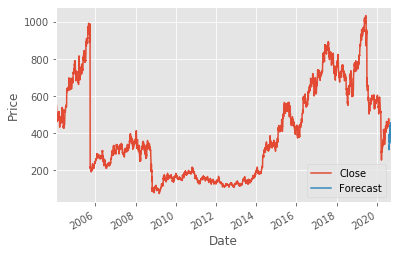

In [84]:
df['Close'].plot()
df['Forecast'].plot()

plt.legend(loc= 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [85]:
df.tail()

,Close,HL_PCT,CO_PCT,Volume,label,Forecast
Date,,,,,,
2020-09-10 05:30:00,NaN,NaN,NaN,NaN,NaN,456.186689
2020-09-11 05:30:00,NaN,NaN,NaN,NaN,NaN,436.043558
2020-09-12 05:30:00,NaN,NaN,NaN,NaN,NaN,437.566826
2020-09-13 05:30:00,NaN,NaN,NaN,NaN,NaN,432.275471
2020-09-14 05:30:00,NaN,NaN,NaN,NaN,NaN,431.841601
